In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [210]:
df=pd.read_csv('insurance.csv')

In [211]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [214]:
lr = LogisticRegression() #logisticregression
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8333333333333334

In [215]:
svm =SVC() #svm
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.8333333333333334

In [216]:
rf = RandomForestClassifier(n_estimators=40) #randomforest
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6666666666666666

In [217]:
from sklearn.model_selection import cross_val_score #cross_val_score

In [218]:
LR=cross_val_score(LogisticRegression(), df[['age']], df.bought_insurance, cv=3)
LR

array([0.8       , 0.88888889, 0.77777778])

In [219]:
svm = cross_val_score(SVC(), df[['age']], df.bought_insurance, cv=3)
svm

array([0.8       , 0.88888889, 0.88888889])

In [220]:
RF = cross_val_score(RandomForestClassifier(n_estimators=40), df[['age']], df.bought_insurance, cv=3)
RF

array([0.5       , 0.77777778, 0.77777778])

In [221]:
np.average(LR)

0.8222222222222223

In [222]:
np.average(RF)

0.6851851851851851

In [223]:
np.average(svm)

0.8592592592592592

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [225]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [226]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0],
       [1, 1]], dtype=int64)

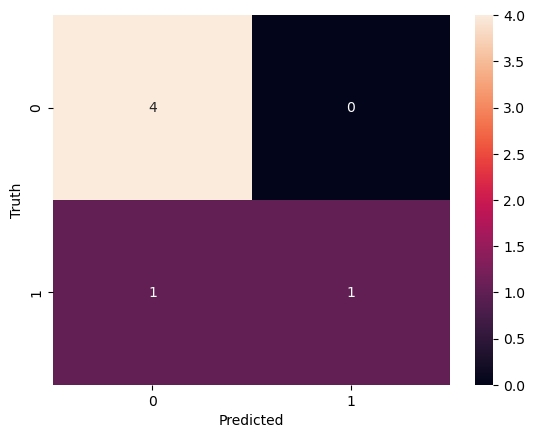

In [227]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()